!pip install fluprodia tespy #convert this cell to code the first time you run to install the packages

## Parameters

In [6]:
T_cond = 50
T_evap = -10
N=1
wf="R290"
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Regular Heat Pump for comparison

Regular: DeltaT = 76.18 K
flowrate: 3.253964620126487 l/s


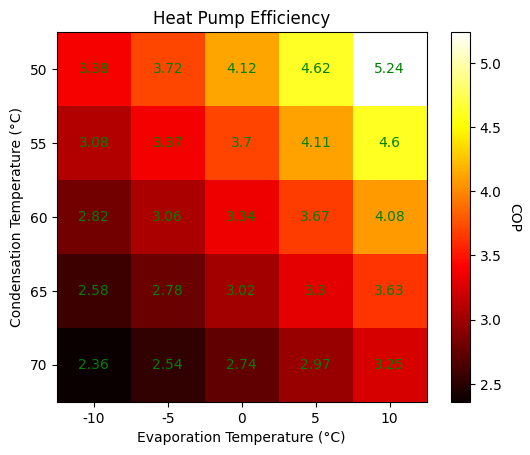

In [7]:

from HPS_regular import RegularHeatPumpStudy

regular_study = RegularHeatPumpStudy(working_fluid=wf
                                     ).set_boundary_conditions(T_cond=T_cond, T_evap=T_evap,                                       
                                     ).solve()
print(f"Regular: DeltaT = {regular_study.get_delta_T():.2f} K")
print(f"flowrate: {regular_study.conn['evaporator-compressor'].get_attr('v').val} l/s")
#regular_study.plot_ts_diag("output/regular_heat_pump_ts_diagram")
#regular_study.plot_logph_diag("output/regular_heat_pump_logph_diagram")
regular_efficiency_matrix = regular_study.plot_efficiency("output/regular_heat_pump_efficiency")


# Intercooling effectiveness

In [8]:
from HPS_intercooler import IntercoolerHeatPumpStudy


intercooler_study = IntercoolerHeatPumpStudy(working_fluid=wf, N=N
                                            ).set_boundary_conditions(T_cond=T_cond, T_evap=T_evap
                                            ).solve()

print(f"Intercooler: DeltaT = {intercooler_study.get_delta_T():.2f} K")
#intercooler_study.plot_ts_diag("output/intercooler_ts_diagram", x_max=3000)
#intercooler_study.plot_logph_diag("output/intercooler_logph_diagram", x_max=800)
#intercooler_study.plot_efficiency("output/intercooler_heat_pump_efficiency.svg")
#intercooler_study.plot_relative_efficiency("output/intercooler_heat_pump_relative_efficiency.svg", regular_efficiency_matrix)

Intercooler: DeltaT = 55.87 K


# Energy Recovery Study

Energy recovery: DeltaT = 76.18 K


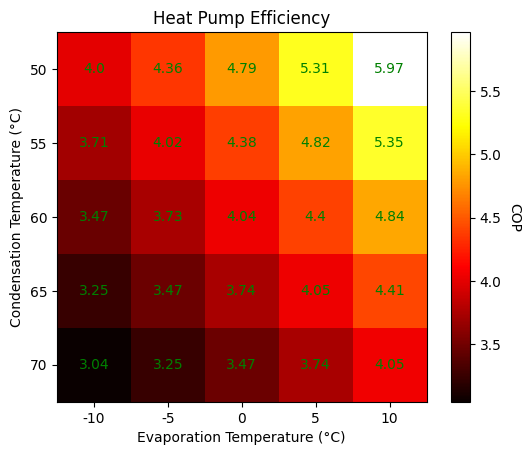

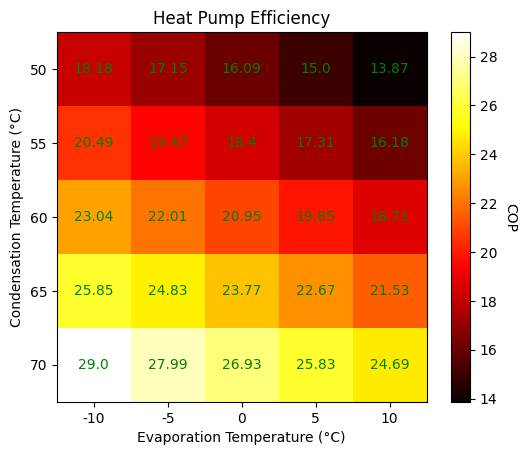

array([[18.17503929, 17.14870082, 16.08852736, 14.99617868, 13.87253448],
       [20.49271143, 19.46625304, 18.40321433, 17.30566889, 16.1750551 ],
       [23.03560052, 22.01145259, 20.94753139, 19.84628986, 18.70964475],
       [25.84983866, 24.83126587, 23.76922524, 22.66653714, 21.52556016],
       [28.99933844, 27.9907509 , 26.93440823, 25.8335022 , 24.69082497]])

In [9]:
from HPS_regular import RegularHeatPumpStudy

energy_recovery_study = RegularHeatPumpStudy(working_fluid=wf, expansion_device="expander"
                                                        ).set_boundary_conditions(T_cond=T_cond, T_evap=T_evap
                                                        ).solve()

# calculate maximum temperature difference between the compressor intake and outlet
print(f"Energy recovery: DeltaT = {energy_recovery_study.get_delta_T():.2f} K")
#energy_recovery_study.plot_logph_diag("output/energy_recovery_logph_diagram", x_max=700)
#energy_recovery_study.plot_ts_diag("output/energy_recovery_ts_diagram")
expander_efficiency_matrix = energy_recovery_study.plot_efficiency("output/energy_recovery_heat_pump_efficiency")
energy_recovery_study.plot_relative_efficiency("output/energy_recovery_heat_pump_relative_efficiency", regular_efficiency_matrix)

# Multistage Condenser Study

Internal condenser: DeltaT = 70.00 K


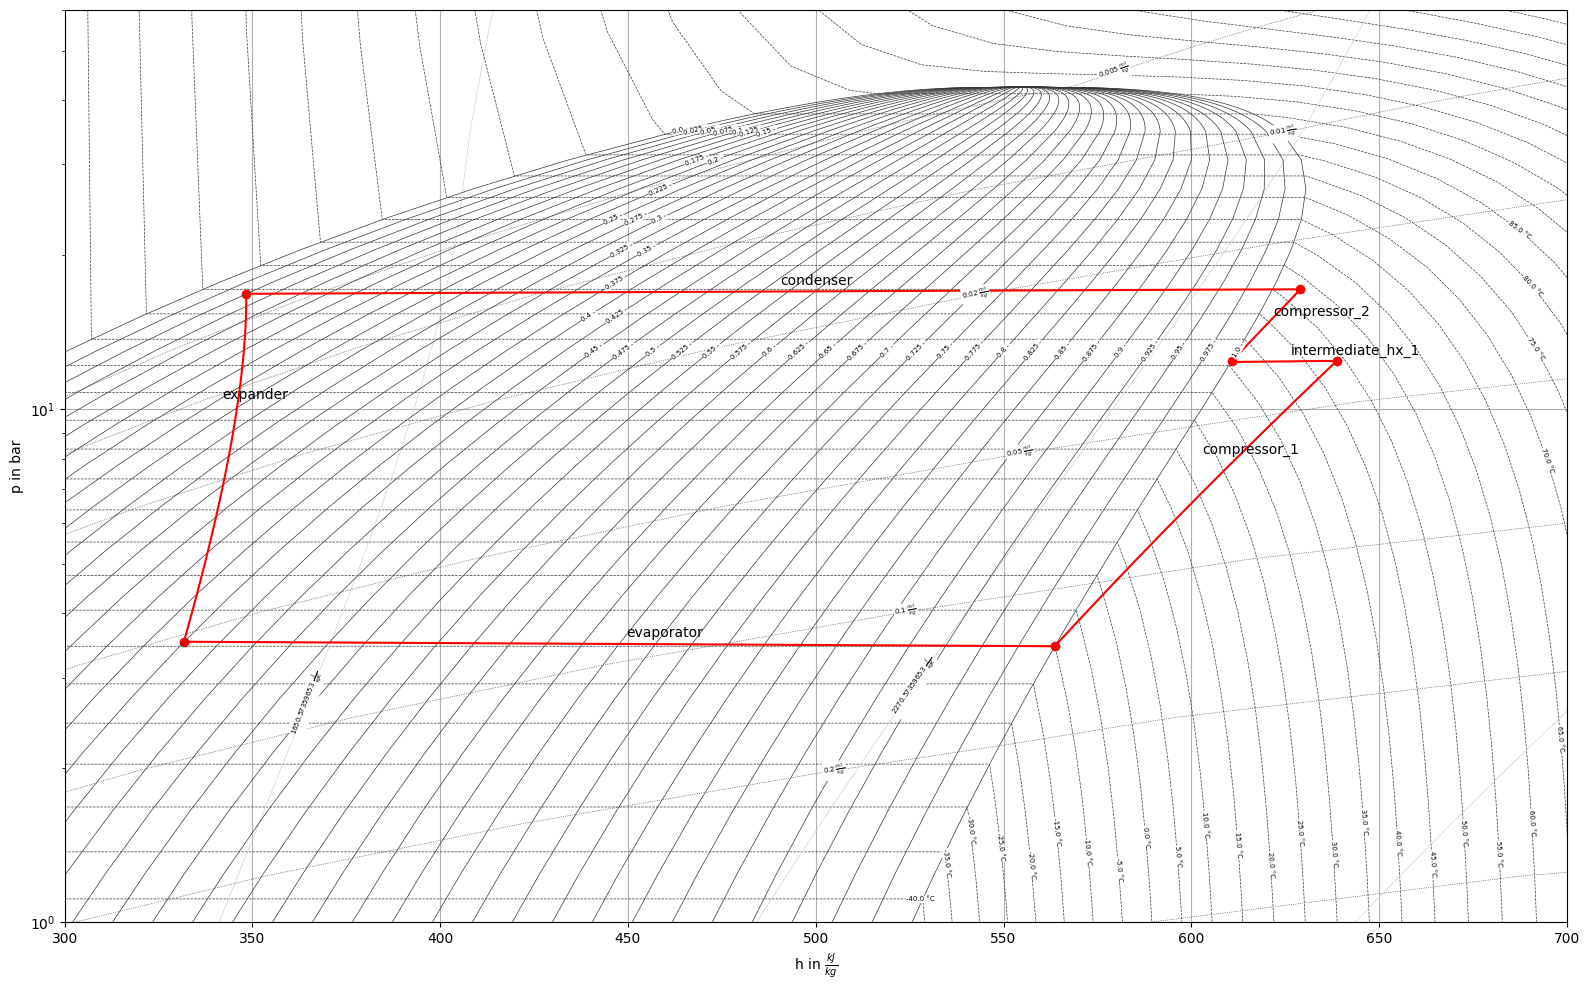

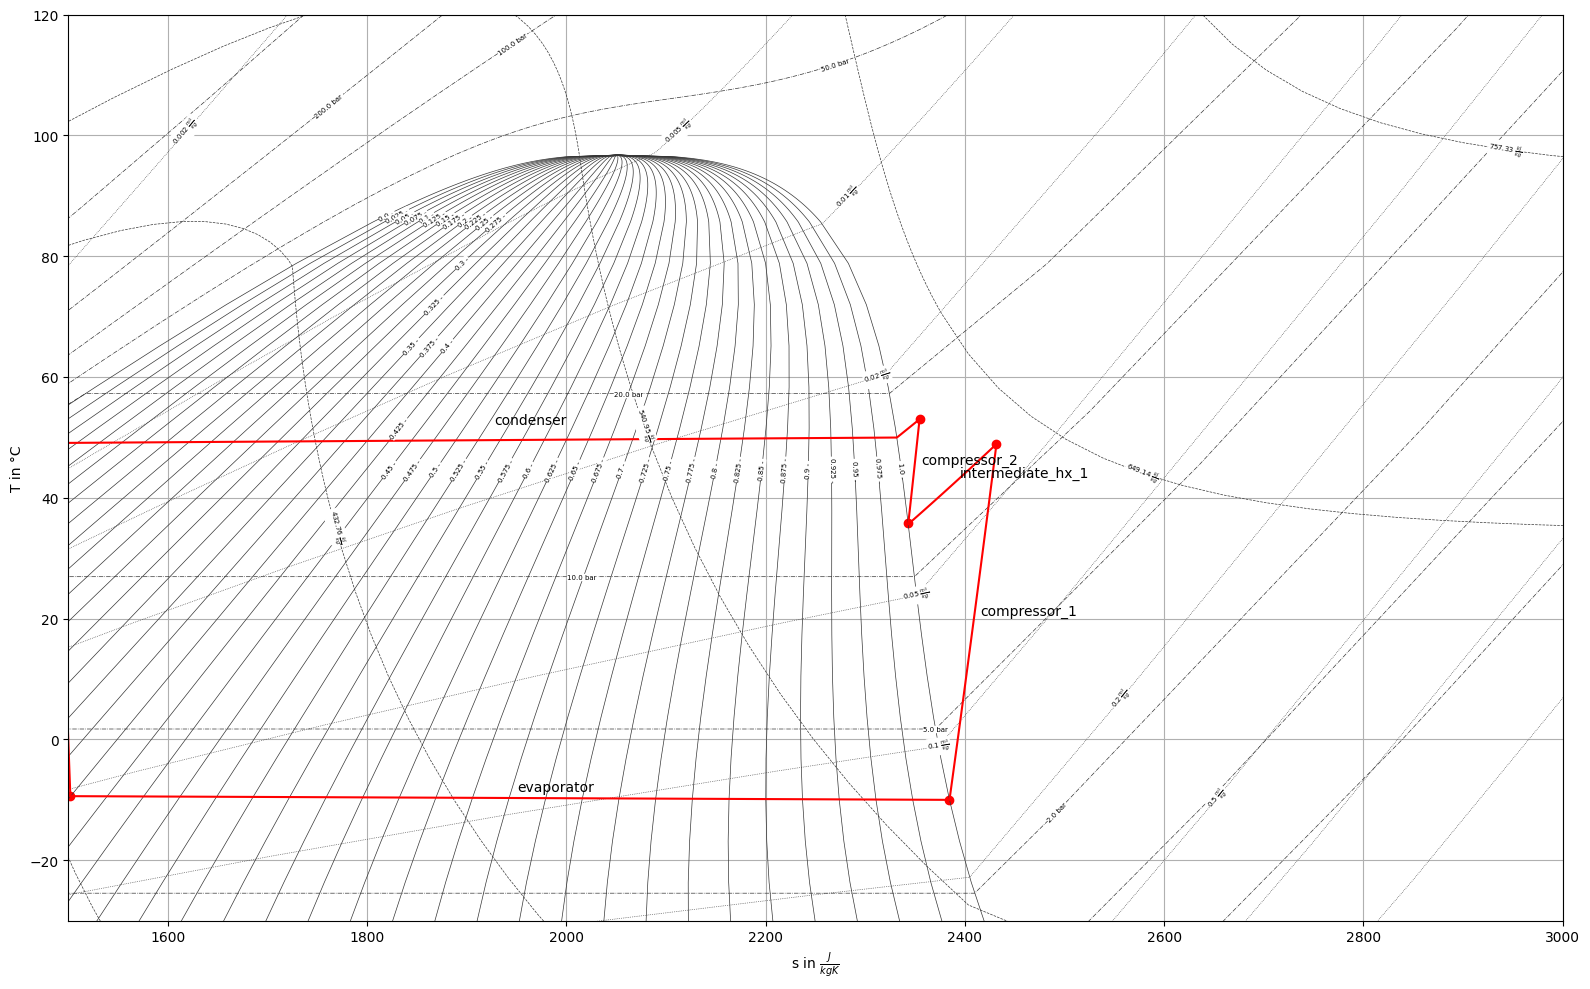

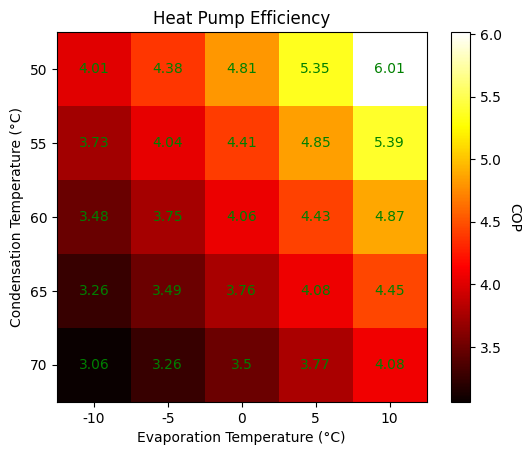

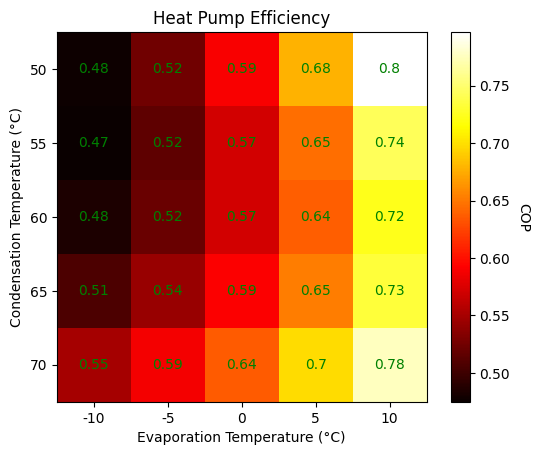

array([[0.4768368 , 0.52418354, 0.58958306, 0.67803657, 0.7966513 ],
       [0.47487647, 0.51526482, 0.57088001, 0.64539931, 0.74377759],
       [0.48434905, 0.5210238 , 0.57102083, 0.63719322, 0.72320925],
       [0.50733701, 0.54316163, 0.59104375, 0.65331901, 0.73287455],
       [0.54973642, 0.58733374, 0.63618577, 0.6983071 , 0.77611325]])

In [10]:
from HPS_multistage_condenser import InternalCondenserHeatPumpStudy
internal_condenser_study = InternalCondenserHeatPumpStudy(working_fluid=wf, N=1, expansion_device="expander"
                                                    ).setup_network(
                                                    ).set_boundary_conditions(T_cond=T_cond, T_evap=T_evap, T_consumer=60
                                                    ).solve(max_iter=200)
print(f"Internal condenser: DeltaT = {internal_condenser_study.get_delta_T():.2f} K")
internal_condenser_study.plot_logph_diag("output/internal_condenser_logph_diagram")
internal_condenser_study.plot_ts_diag("output/internal_condenser_ts_diagram", x_max=3000)
internal_condenser_study.plot_efficiency("output/multistage_heat_pump_efficiency")
internal_condenser_study.plot_relative_efficiency("output/multistage_heat_pump_relative_efficiency", expander_efficiency_matrix)

# Vapor Injection Heat Pump Study

Vapor injection: DeltaT = 68.25 K


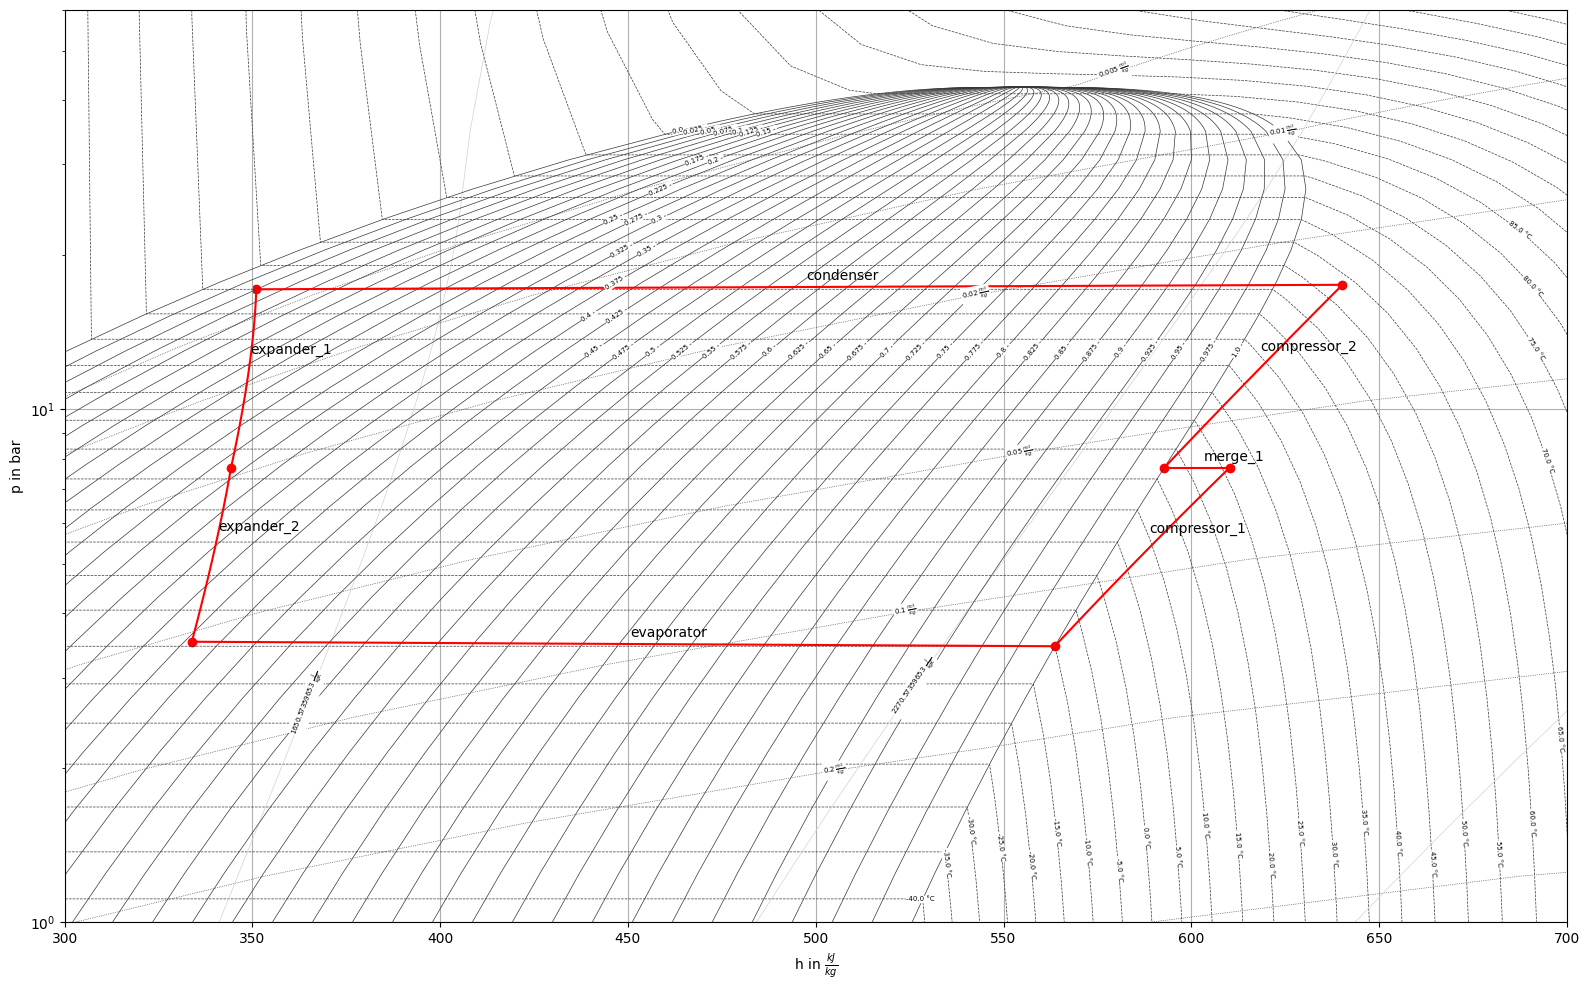

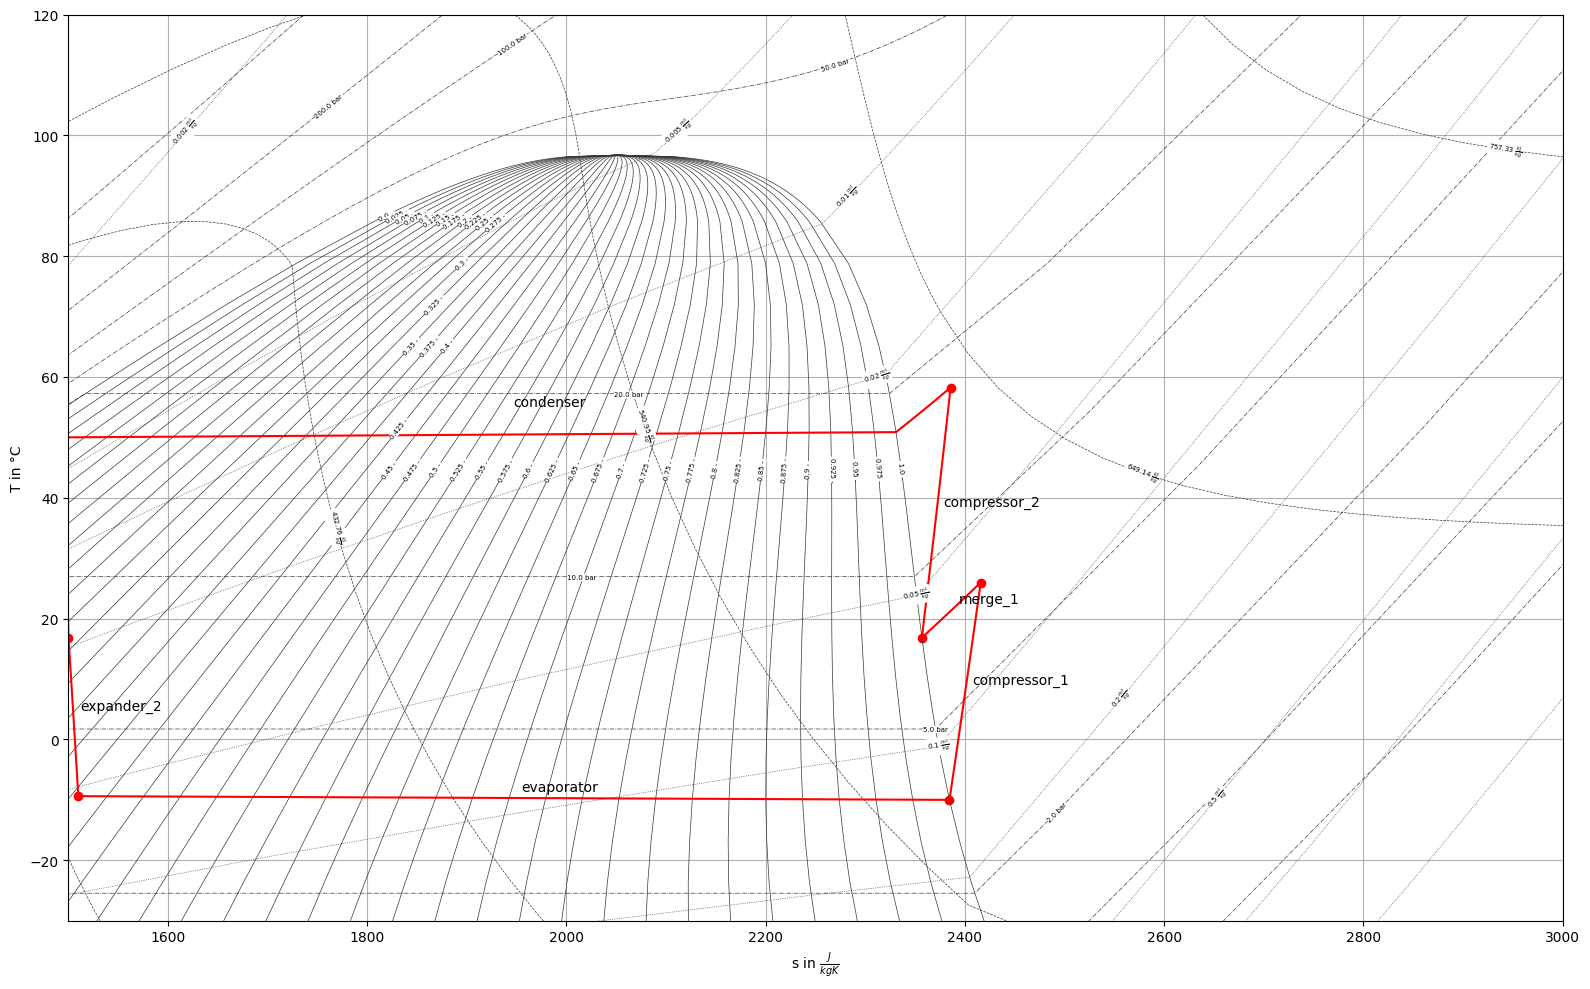

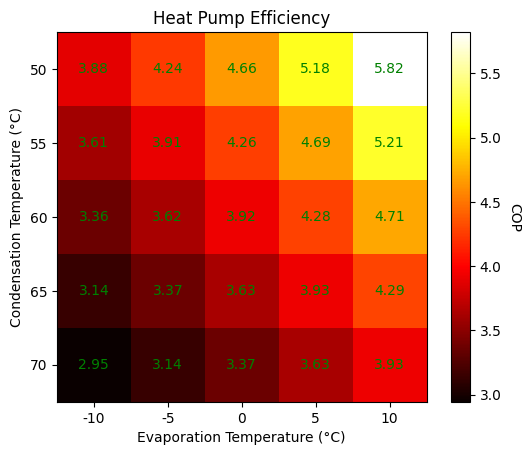

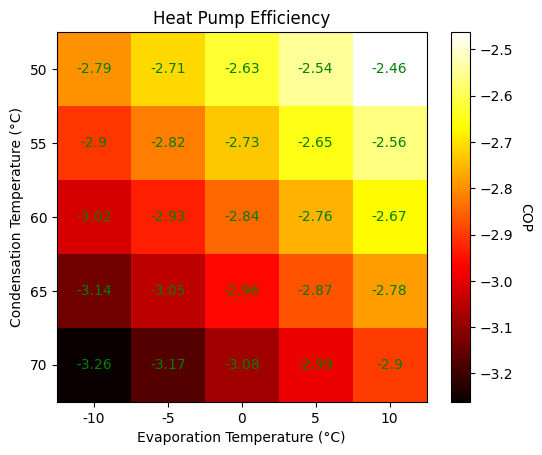

array([[-2.79407528, -2.71099849, -2.62762609, -2.54456915, -2.4626964 ],
       [-2.90392051, -2.81912904, -2.73386976, -2.64857148, -2.56383852],
       [-3.01781858, -2.93139125, -2.84440721, -2.75715266, -2.67003923],
       [-3.13654934, -3.04849622, -2.95986202, -2.87081273, -2.78160636],
       [-3.26123118, -3.17150644, -3.0812355 , -2.99047719, -2.89935755]])

In [11]:
from HPS_vapor_injection import VaporInjectionHeatPumpStudy
vapor_injection_study = VaporInjectionHeatPumpStudy(working_fluid=wf, N=1, expansion_device="expander"
                                                    ).set_boundary_conditions(T_cond=T_cond, T_evap=T_evap
                                                    ).solve(max_iter=50)
print(f"Vapor injection: DeltaT = {vapor_injection_study.get_delta_T():.2f} K")
vapor_injection_study.plot_logph_diag(f"output/vapor_injection_{N}_logph_diagram", x_max=700)
vapor_injection_study.plot_ts_diag(f"output/vapor_injection_{N}_ts_diagram", x_max=3000)
vapor_injection_study.plot_efficiency(f"output/vapor_injection_{N}_heat_pump_efficiency")
vapor_injection_study.plot_relative_efficiency(f"output/vapor_injection_{N}_heat_pump_relative_efficiency", expander_efficiency_matrix)

Vapor injection: DeltaT = 65.91 K


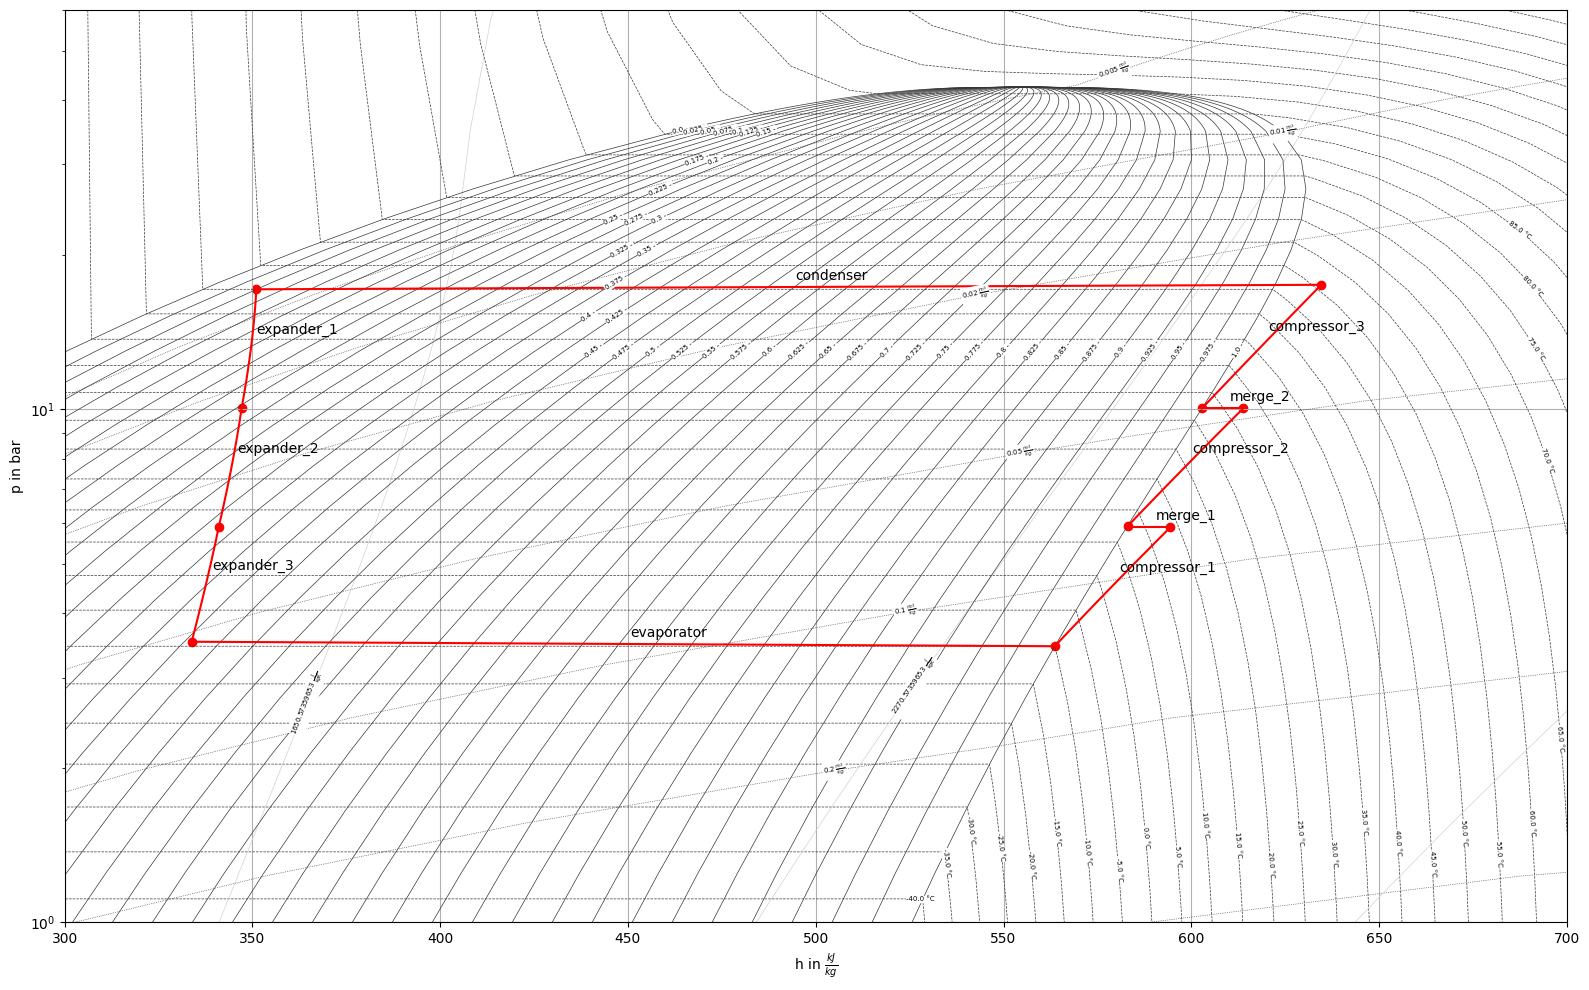

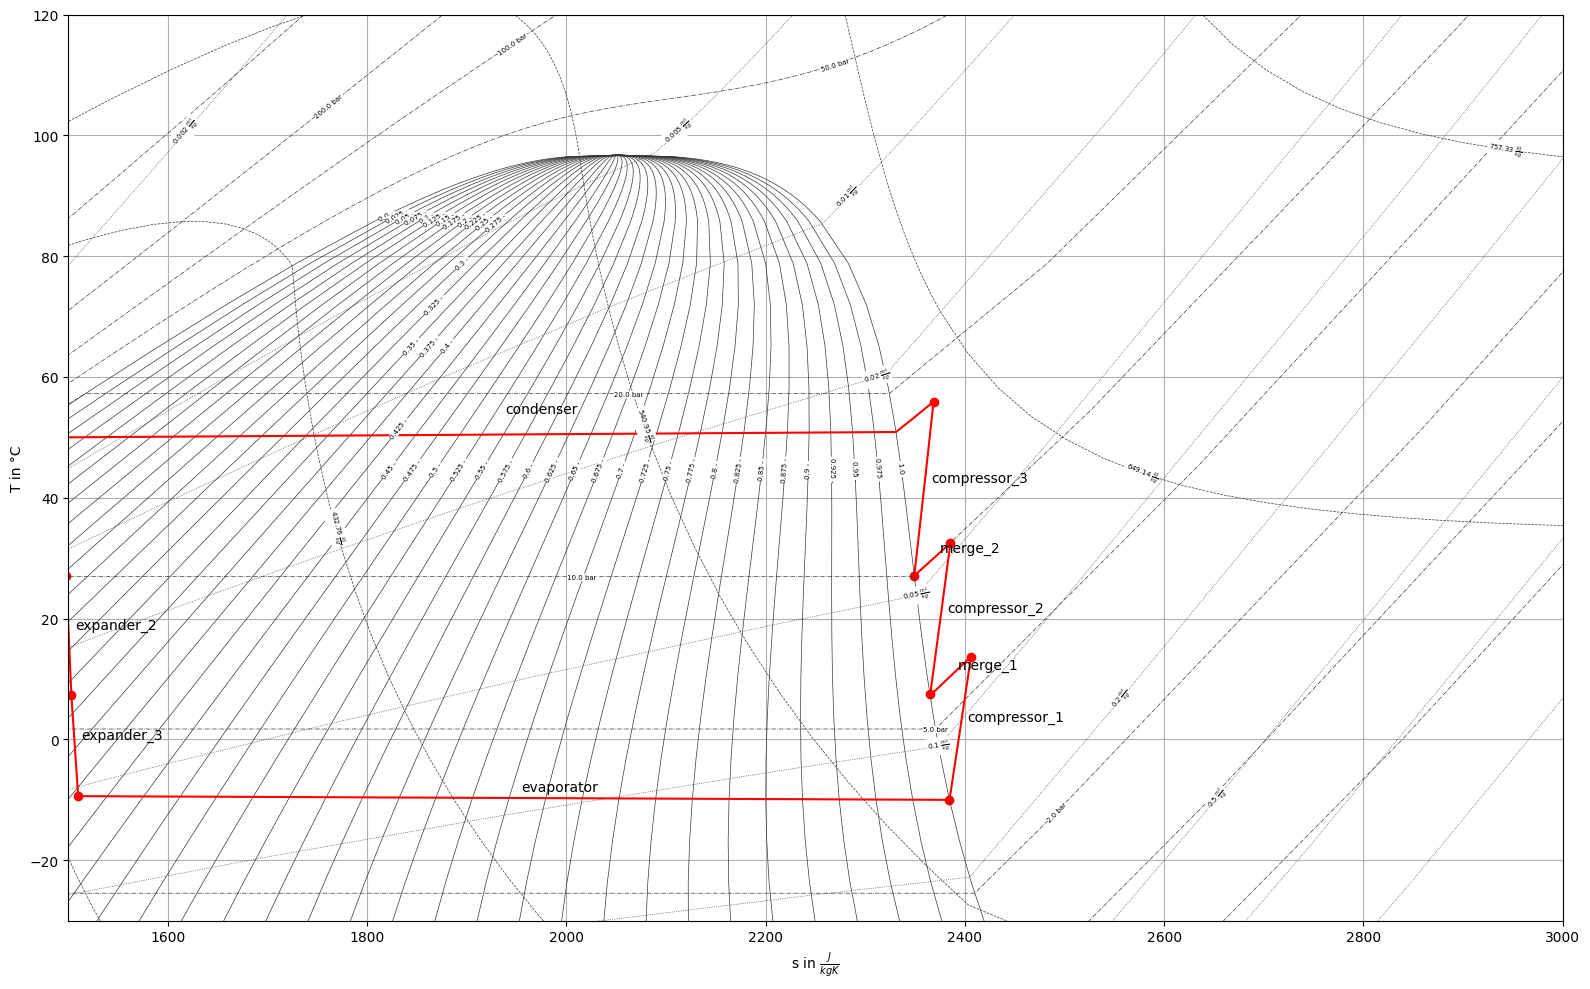

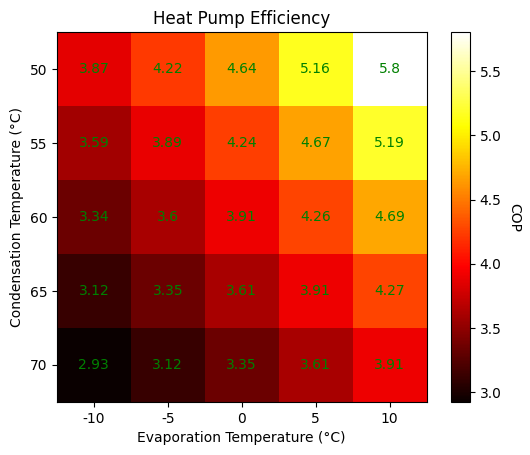

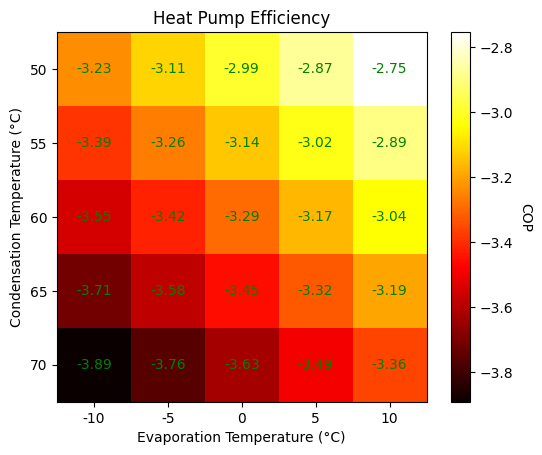

array([[-3.23363138, -3.11318122, -2.99233776, -2.87183776, -2.75265451],
       [-3.38598204, -3.26280684, -3.13911742, -3.01546639, -2.89255836],
       [-3.54511342, -3.41911191, -3.2925548 , -3.16585151, -3.0395105 ],
       [-3.71282775, -3.58380119, -3.45423596, -3.32442207, -3.1947117 ],
       [-3.89177427, -3.75944258, -3.62663964, -3.49355066, -3.360394  ]])

In [12]:
from HPS_vapor_injection import VaporInjectionHeatPumpStudy
vapor_injection_study = VaporInjectionHeatPumpStudy(working_fluid=wf, N=2, expansion_device="expander"
                                                    ).set_boundary_conditions(T_cond=T_cond, T_evap=T_evap
                                                    ).solve(max_iter=50)
print(f"Vapor injection: DeltaT = {vapor_injection_study.get_delta_T():.2f} K")
vapor_injection_study.plot_logph_diag(f"output/vapor_injection_{N}_logph_diagram", x_max=700)
vapor_injection_study.plot_ts_diag(f"output/vapor_injection_{N}_ts_diagram", x_max=3000)
vapor_injection_study.plot_efficiency(f"output/vapor_injection_{N}_heat_pump_efficiency")
vapor_injection_study.plot_relative_efficiency(f"output/vapor_injection_{N}_heat_pump_relative_efficiency", expander_efficiency_matrix)

Vapor injection: DeltaT = 64.76 K


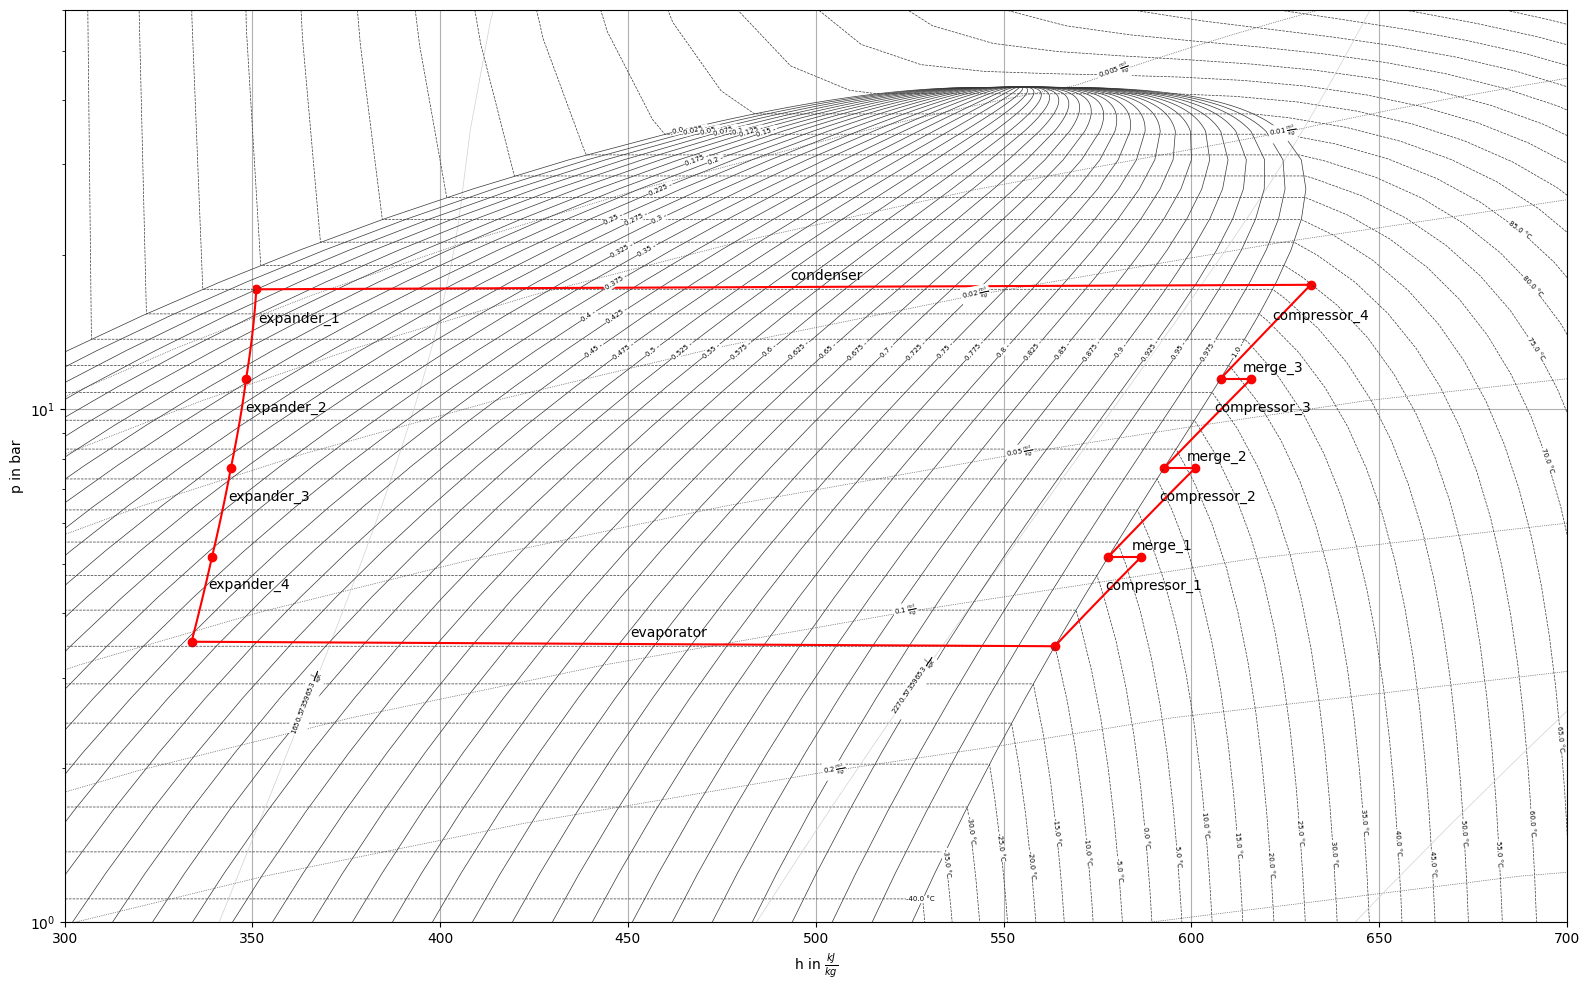

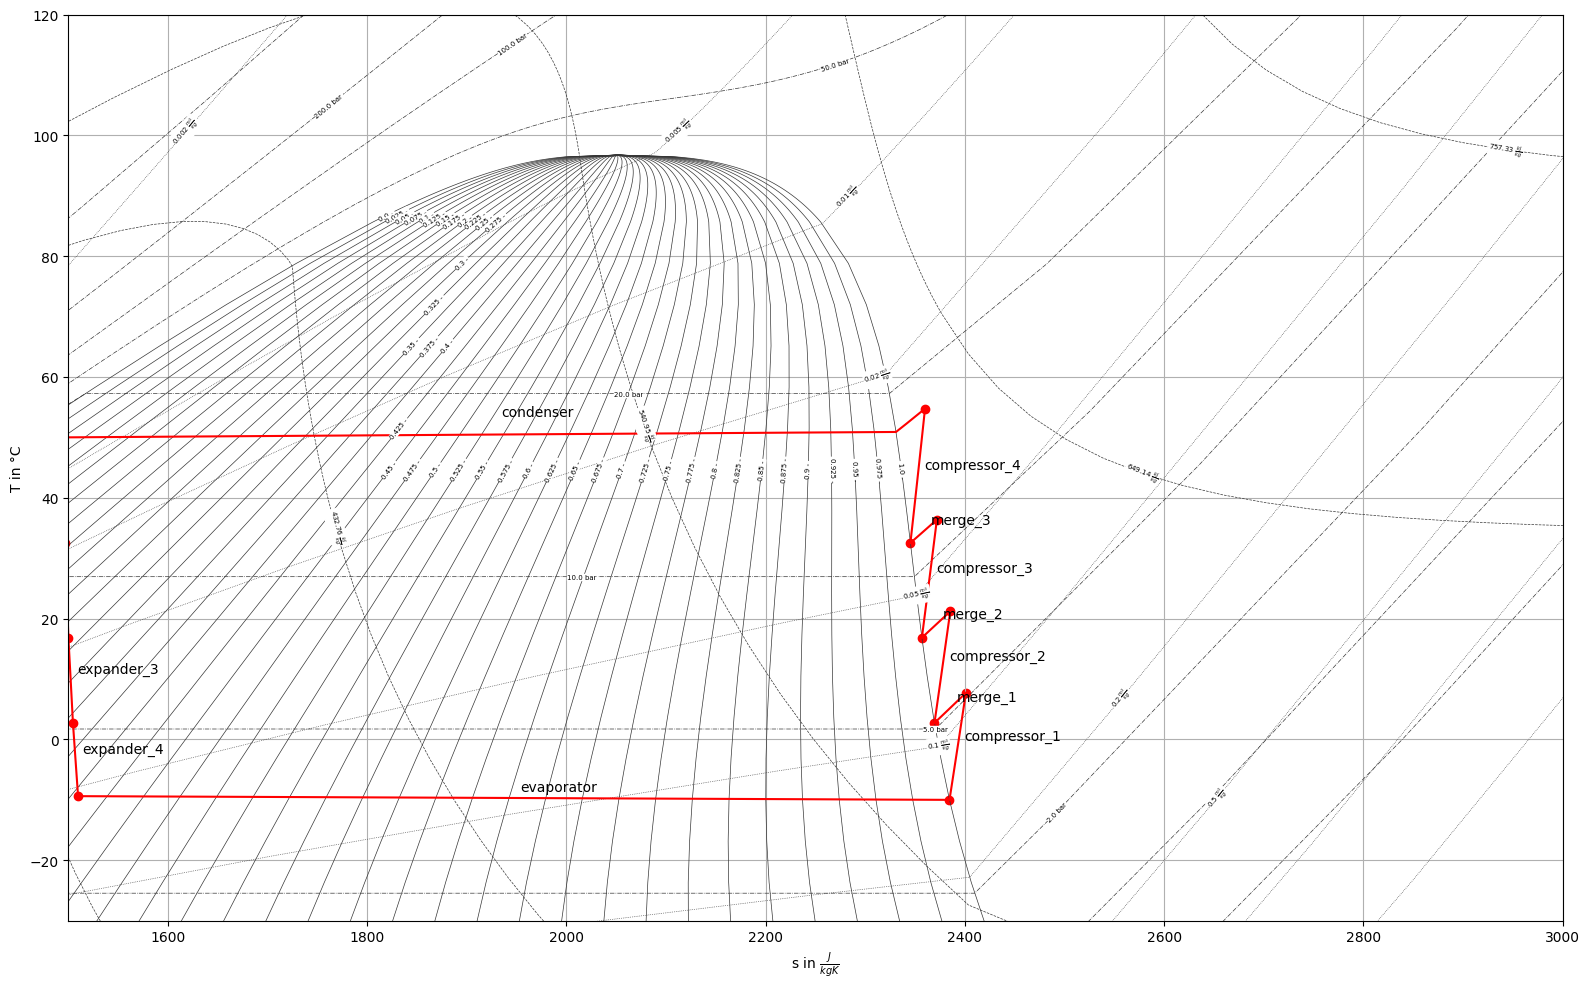

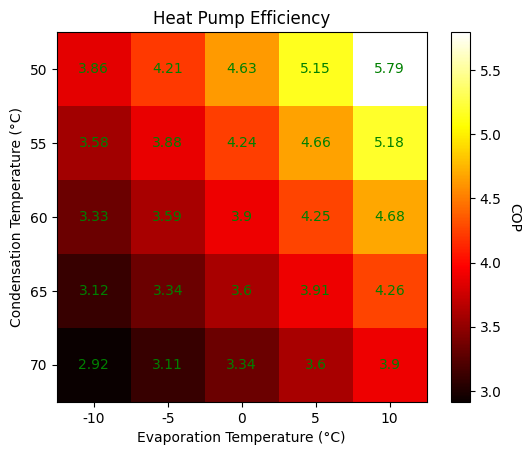

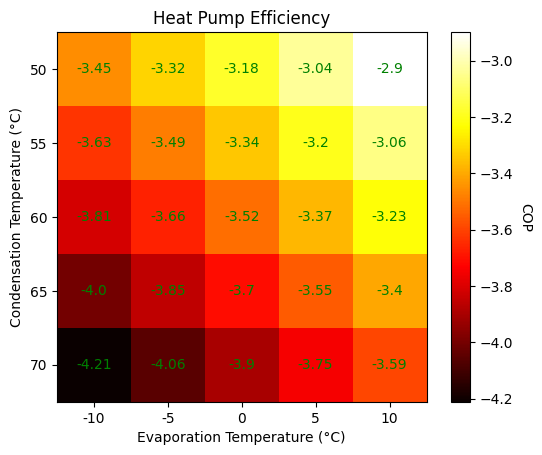

array([[-3.45483179, -3.31546272, -3.17566026, -3.03623221, -2.8982099 ],
       [-3.6288555 , -3.48619634, -3.34301293, -3.19992799, -3.0577021 ],
       [-3.81112983, -3.66497276, -3.5182798 , -3.37153021, -3.22528676],
       [-4.00400147, -3.85402095, -3.70354961, -3.55294789, -3.40262115],
       [-4.21095454, -4.05672345, -3.90209388, -3.74732304, -3.59268188]])

In [13]:
from HPS_vapor_injection import VaporInjectionHeatPumpStudy
vapor_injection_study = VaporInjectionHeatPumpStudy(working_fluid=wf, N=3, expansion_device="expander"
                                                    ).set_boundary_conditions(T_cond=T_cond, T_evap=T_evap
                                                    ).solve(max_iter=50)
print(f"Vapor injection: DeltaT = {vapor_injection_study.get_delta_T():.2f} K")
vapor_injection_study.plot_logph_diag(f"output/vapor_injection_{N}_logph_diagram", x_max=700)
vapor_injection_study.plot_ts_diag(f"output/vapor_injection_{N}_ts_diagram", x_max=3000)
vapor_injection_study.plot_efficiency(f"output/vapor_injection_{N}_heat_pump_efficiency")
vapor_injection_study.plot_relative_efficiency(f"output/vapor_injection_{N}_heat_pump_relative_efficiency", expander_efficiency_matrix)